In [60]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/DV-course/contribution.csv'
data = pd.read_csv(file_url)
print(data.head())



  Gender  Class Year Marital Status    Major Next Degree  FY04Giving  \
0      M        1957              M  History         LLB      2500.0   
1      M        1957              M  Physics          MS      5000.0   
2      F        1957              M    Music        NONE      5000.0   
3      M        1957              M  History        NONE         0.0   
4      M        1957              M  Biology          MD      1000.0   

   FY03Giving  FY02Giving  FY01Giving  FY00Giving  AttendenceEvent  
0      2500.0      1400.0     12060.0     12000.0                1  
1      5000.0      5000.0      5000.0     10000.0                1  
2      5000.0      5000.0      5000.0     10000.0                1  
3      5100.0       200.0       200.0         0.0                1  
4      1000.0      1000.0      1005.0      1000.0                1  


In [61]:
# Kiểm tra giá trị null trong các cột
print(data.isnull().sum())

Gender             0
Class Year         0
Marital Status     0
Major              0
Next Degree        0
FY04Giving         0
FY03Giving         0
FY02Giving         0
FY01Giving         0
FY00Giving         0
AttendenceEvent    0
dtype: int64


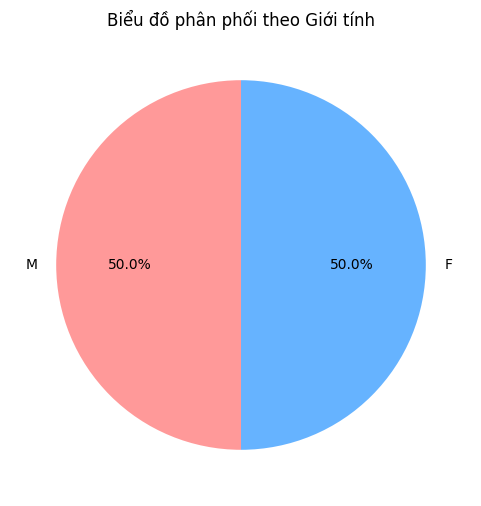

In [62]:
# Đếm số lượng theo giới tính
gender_counts = data['Gender'].value_counts()

# Vẽ biểu đồ pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Biểu đồ phân phối theo Giới tính')
plt.show()


Nhận xét : Biểu đồ này cho thấy sự cân bằng về giới tính giữa những cựu sinh viên tham gia đóng góp, không có sự chênh lệch rõ rệt nào giữa nam và nữ trong việc ủng hộ tài chính cho trường.
Điều này có thể cho thấy rằng cả nam và nữ đều quan tâm và sẵn lòng đóng góp cho các hoạt động của trường đại học, bất kể sự khác biệt về giới tính.
Việc có sự phân bố đồng đều như vậy cũng là một tín hiệu tích cực cho trường, vì điều đó chứng tỏ rằng cả hai giới đều có ảnh hưởng tương đương trong các hoạt động hỗ trợ nhà trường.

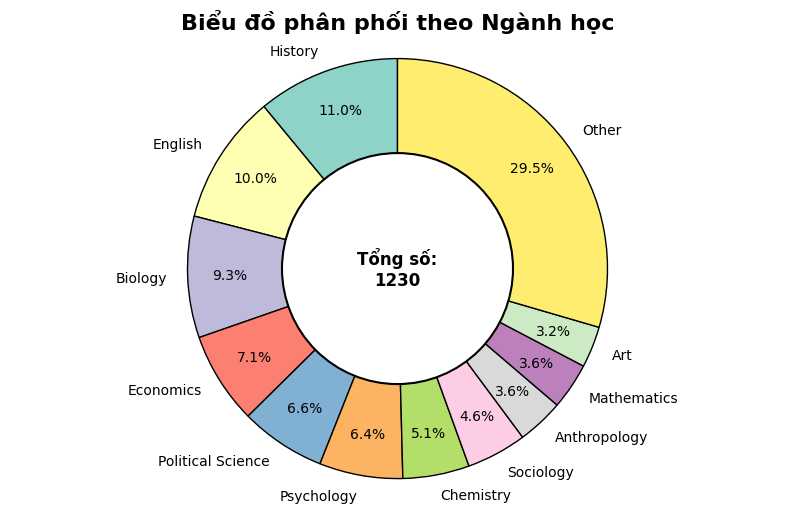

In [63]:
#Task 3:
# Tính phần trăm cho từng ngành học
percentages = major_counts / major_counts.sum() * 100

# Gộp các ngành có phần trăm nhỏ hơn 3% vào nhóm 'Other'
major_counts_combined = major_counts.copy()
other_sum = major_counts_combined[percentages < 3].sum()  # Tổng các ngành có tỷ lệ nhỏ hơn 3%
major_counts_combined = major_counts_combined[percentages >= 3]  # Lọc các ngành có tỷ lệ >= 3%
major_counts_combined['Other'] = other_sum  # Gộp nhóm 'Other'


plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(range(len(major_counts_combined)))
wedges, texts, autotexts = plt.pie(major_counts_combined, 
                                   labels=major_counts_combined.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors, 
                                   pctdistance=0.8,  
                                   labeldistance=1.1,  #
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 1}, 
                                   textprops={'fontsize': 10}) 

# Vẽ donut có thể sẽ dễ nhìn hơn (theo em nghĩ thế)
centre_circle = plt.Circle((0,0),0.55,fc='white', edgecolor='black', linewidth=1.5)  
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Thêm một dòng sum up cho số lượng ngành
total = major_counts.sum()
plt.text(0, 0, f'Tổng số:\n{total}', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')


plt.title('Biểu đồ phân phối theo Ngành học', fontsize=16, fontweight='bold')
plt.axis('equal')  

# Tùy chỉnh thêm phần trăm và nhãn
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.show()


Nhận xét chung: Nhóm ngành học lớn nhất trong biểu đồ là nhóm "Other" (Khác), chiếm **29.5%** tổng số cựu sinh viên, cho thấy có rất nhiều ngành học khác nhau nhưng mỗi ngành có tỷ lệ nhỏ hơn 3%, do đó được gộp lại thành một nhóm chung. Điều này phản ánh sự đa dạng về lĩnh vực học tập của cựu sinh viên, với nhiều ngành không được thể hiện riêng biệt do số lượng ít. Ngược lại, các ngành có tỷ lệ nhỏ nhưng trên 3% vẫn được liệt kê riêng như **Nghệ thuật (Art)**, **Toán học (Mathematics)**, và **Nhân học (Anthropology)**, đều chiếm tỷ lệ khoảng **3.6%**. Điều này cho thấy đây là những ngành có số lượng cựu sinh viên tương đối thấp, nhưng vẫn đủ để có sự hiện diện đáng kể trong tổng số lượng người đóng góp. Việc này cũng cho thấy rằng các ngành nghệ thuật, khoa học cơ bản, và nhân học tuy không chiếm tỷ lệ lớn, nhưng vẫn đóng góp vào sự đa dạng của các lĩnh vực học tập trong cộng đồng cựu sinh viên.

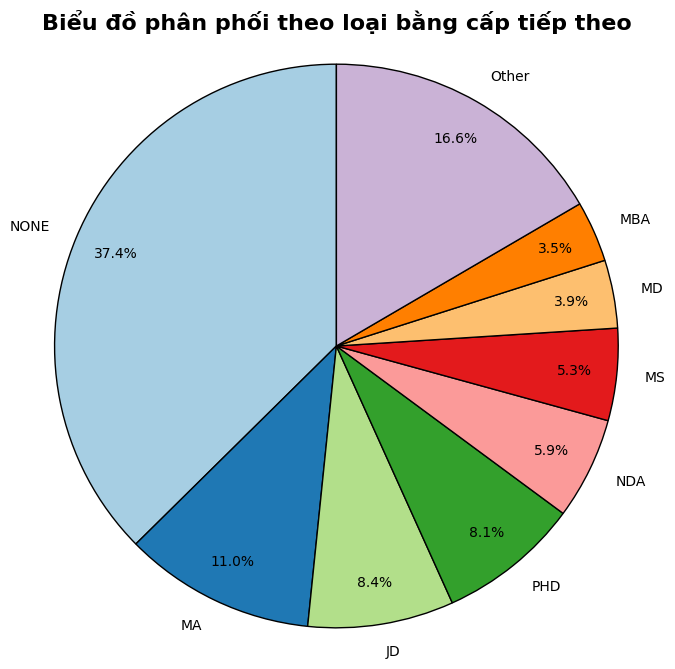

In [64]:
#Task 4
threshold = 3
# Tính phần trăm cho từng loại Next Degree
percentages = next_degree_counts / next_degree_counts.sum() * 100

# Gộp các phần trăm nhỏ hơn ngưỡng vào nhóm "Other"
next_degree_combined = next_degree_counts.copy()
other_sum = next_degree_combined[percentages < threshold].sum()  # Tổng các ngành có tỷ lệ nhỏ hơn threshold
next_degree_combined = next_degree_combined[percentages >= threshold]  # Lọc các ngành có tỷ lệ >= threshold
next_degree_combined['Other'] = other_sum  # Gộp nhóm 'Other'

plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(next_degree_combined)))
wedges, texts, autotexts = plt.pie(next_degree_combined, 
                                   labels=next_degree_combined.index, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors, 
                                   pctdistance=0.85, 
                                   wedgeprops={'edgecolor': 'black'})  

plt.title('Biểu đồ phân phối theo loại bằng cấp tiếp theo', fontsize=16, fontweight='bold')
plt.axis('equal')
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')

plt.show()


Biểu đồ trên cho thấy sự phân bố về các loại bằng cấp mà cựu sinh viên đã tiếp tục theo học sau khi tốt nghiệp đại học ban đầu. Nhóm có tỷ lệ cao nhất là "NONE" (không tiếp tục học lên), chiếm **37.4%**. Điều này có thể cho thấy rằng một lượng lớn cựu sinh viên đã hài lòng với bằng cấp hiện tại và có lẽ đã chọn đi làm ngay thay vì học lên cao hơn. 

Trong số những người tiếp tục học, **MA** (Thạc sĩ Nghệ thuật) chiếm **11.0%**, trở thành bằng cấp phổ biến nhất, chứng tỏ rằng nghệ thuật là lĩnh vực thu hút được sự quan tâm lớn của cựu sinh viên. Tiếp theo, **JD** (Tiến sĩ Luật) với **8.4%** và **PhD** (Tiến sĩ) với **8.1%**, phản ánh rằng một số lượng không nhỏ cựu sinh viên đã chọn theo đuổi các lĩnh vực đòi hỏi trình độ học vấn cao như luật và nghiên cứu học thuật chuyên sâu.

Các nhóm khác như **NDA** (5.9%), **MS** (5.3%), **MD** (3.9%), và **MBA** (3.5%) tuy có tỷ lệ thấp hơn nhưng vẫn thể hiện sự đa dạng trong việc chọn nghề nghiệp và chuyên ngành tiếp tục học lên của cựu sinh viên, từ khoa học đến kinh doanh. Nhóm **"Other"** (Khác) chiếm **16.6%**, đại diện cho nhiều loại bằng cấp khác nhau nhưng không đủ lớn để được tách riêng.

Tóm lại, biểu đồ phản ánh sự đa dạng trong định hướng học tập sau khi tốt nghiệp của cựu sinh viên. Mặc dù một tỷ lệ lớn không học thêm, những người tiếp tục học lại theo đuổi nhiều lĩnh vực khác nhau, đặc biệt là nghệ thuật, luật và học thuật, thể hiện sự phát triển về học vấn và sự nghiệp của họ.

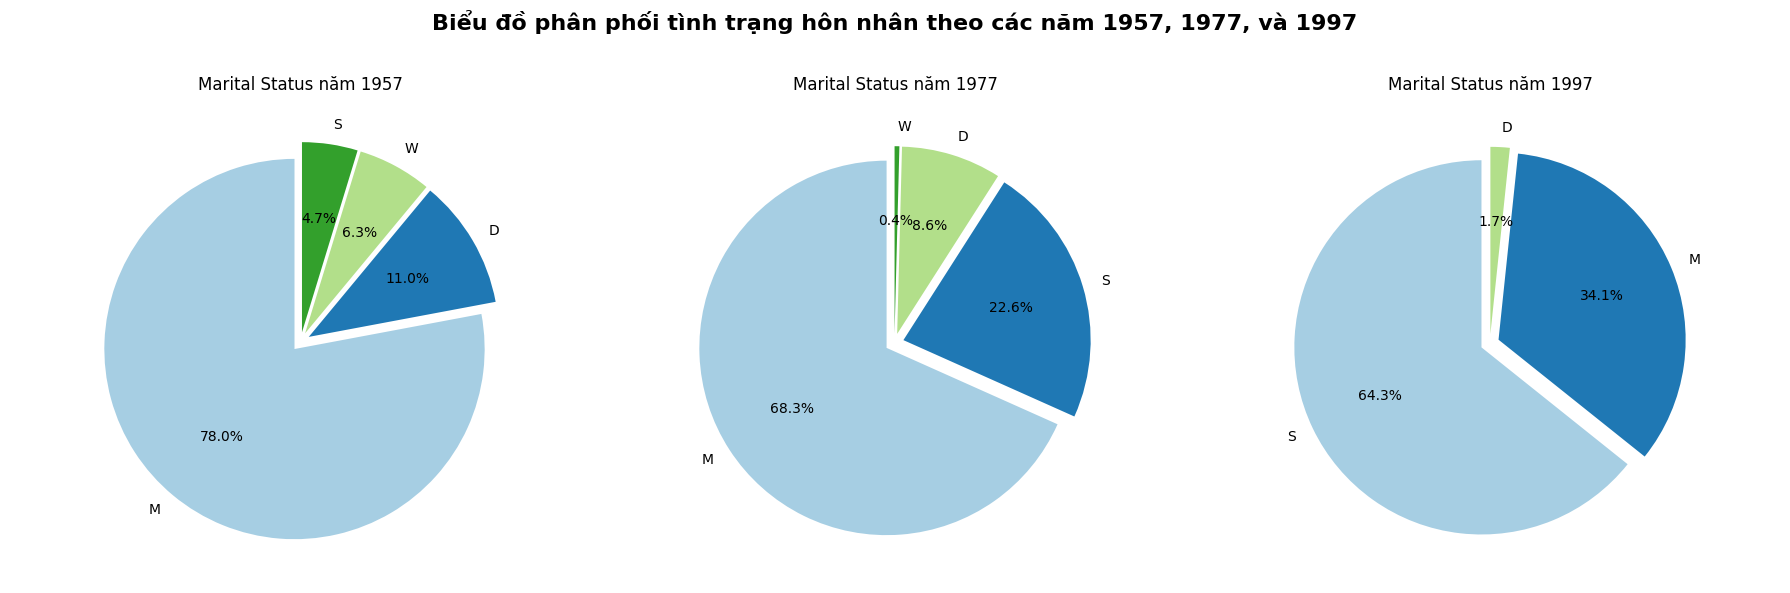

In [86]:
# Lọc dữ liệu theo từng năm
data_1957 = data[data['Class Year'] == 1957]['Marital Status'].value_counts()
data_1977 = data[data['Class Year'] == 1977]['Marital Status'].value_counts()
data_1997 = data[data['Class Year'] == 1997]['Marital Status'].value_counts()

colors = plt.cm.Paired(range(5))  # Adjust colors for consistency
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Tạo danh sách explode tương ứng với số lượng hạng mục trong từng năm
explode_1957 = [0.05, 0.05, 0.05,0.05]
explode_1977 =  [0.05, 0.05, 0.05,0.05]
explode_1997 = [0.05,0.05,0.05]

# Biểu đồ cho năm 1957
axs[0].pie(data_1957, labels=data_1957.index, autopct='%1.1f%%', 
           explode=explode_1957, startangle=90, colors=colors)
axs[0].set_title('Marital Status năm 1957')

# Biểu đồ cho năm 1977
axs[1].pie(data_1977, labels=data_1977.index, autopct='%1.1f%%', 
           explode=explode_1977, startangle=90, colors=colors)
axs[1].set_title('Marital Status năm 1977')

# Biểu đồ cho năm 1997
axs[2].pie(data_1997, labels=data_1997.index, autopct='%1.1f%%', 
           explode=explode_1997, startangle=90, colors=colors)
axs[2].set_title('Marital Status năm 1997')

# Đảm bảo các biểu đồ có tỷ lệ bằng nhau
for ax in axs:
    ax.axis('equal')

plt.suptitle('Biểu đồ phân phối tình trạng hôn nhân theo các năm 1957, 1977, và 1997', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Biểu đồ cho thấy sự thay đổi tình trạng hôn nhân qua ba năm 1957, 1977, và 1997. Năm 1957, tỷ lệ kết hôn chiếm **78%**, nhưng giảm dần qua các năm, chỉ còn **68.3%** vào năm 1977 và **64.3%** vào năm 1997. Ngược lại, tỷ lệ độc thân tăng từ **11%** (1957) lên **22.6%** (1977) và đạt **34.1%** vào năm 1997. Ly dị tăng từ **4.7%** (1957) lên **8.6%** (1977), nhưng giảm xuống **1.7%** vào năm 1997. Tỷ lệ góa cũng giảm đáng kể từ **6.3%** năm 1957 xuống chỉ **0.4%** và **1.7%** trong các năm sau.